In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

#### Use FDM to solve y''(t) = 6t

In [2]:
def const_diag_offset(N, value, offset):

    # Initialize A
    A = np.zeros((N,N), dtype=np.float64)

    # Assign the (offset) diagonal element with const value
    for i in range(N):
        column = i + offset
        if column>=0 and column<N:
            A[i][column] = value
    
    return A

In [28]:
# The dimmension
n = 19

# The step
h = 0.05

# Generate the matrix in exercise 6
A =   const_diag_offset(n,  1, -1) \
    + const_diag_offset(n, -2,  0) \
    + const_diag_offset(n,  1,  1) 


# Generate b vector
b     = np.linspace(0.05, 0.95, n) * 6.*h**2.
b[0]  = b[0]  - 1 # To satisfy BC
b[-1] = b[-1] - 1 # To satisfy BC

In [29]:
b

array([-0.99925,  0.0015 ,  0.00225,  0.003  ,  0.00375,  0.0045 ,
        0.00525,  0.006  ,  0.00675,  0.0075 ,  0.00825,  0.009  ,
        0.00975,  0.0105 ,  0.01125,  0.012  ,  0.01275,  0.0135 ,
       -0.98575])

In [30]:
# Using scipy for LU decomposition
lu, piv = scipy.linalg.lu_factor(A)

# Solve Ax = b
y = scipy.linalg.lu_solve((lu, piv), b)

In [31]:
# Print the solution
y

array([0.950125, 0.901   , 0.853375, 0.808   , 0.765625, 0.727   ,
       0.692875, 0.664   , 0.641125, 0.625   , 0.616375, 0.616   ,
       0.624625, 0.643   , 0.671875, 0.712   , 0.764125, 0.829   ,
       0.907375])

In [32]:
# Check if the solution x is correct
np.allclose(A @ y - b, np.zeros((n,)))

True

#### Plot the FDM result and compare to analytical solution

In [42]:
t           = np.linspace(0., 1., 21)
y_anal      = t**3. - t + 1    # Analytical solution
y_fdm       = np.full(21, 1.)  # BC
y_fdm[1:20] = y                # FDM solution + BC

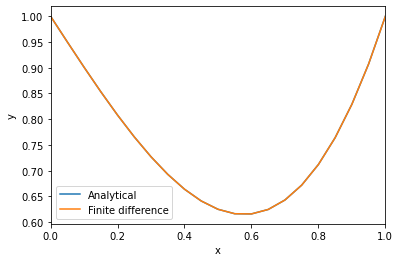

In [43]:
fig, ax = plt.subplots()

ax.set(
    xlabel='x',
    ylabel='y',
    xlim = [0,1],
)

ax.plot(t, y_anal, label='Analytical')
ax.plot(t, y_fdm , label='Finite difference')

ax.legend()

In [36]:
y - y_anal

array([-1.11022302e-16, -1.11022302e-16,  0.00000000e+00,  1.11022302e-16,
        2.22044605e-16,  2.22044605e-16,  1.11022302e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.11022302e-16,  1.11022302e-16,
        1.11022302e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.11022302e-16,  0.00000000e+00])